In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreatorsLab/hate_speech/labeled_data.csv')

In [4]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
import nltk
from nltk.util import pr
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [7]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [8]:
df["labels"] = df["class"].map({0: "Hate Speech",
                                    1: "Offensive Language",
                                    2: "No Hate and Offensive"})

In [9]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


In [10]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub(r"\@w+|\#",'',text)
    text = re.sub(r"[^\w\s]",'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    tweet_tokens = word_tokenize(text)
    filtered_tweets=[w for w in tweet_tokens if not w in stopword]
    return " ".join(filtered_tweets)

In [11]:
nltk.download('punkt')
df.tweet=df['tweet'].apply(clean)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
df = df.drop_duplicates("tweet")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24506 entries, 0 to 24782
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24506 non-null  int64 
 1   count               24506 non-null  int64 
 2   hate_speech         24506 non-null  int64 
 3   offensive_language  24506 non-null  int64 
 4   neither             24506 non-null  int64 
 5   class               24506 non-null  int64 
 6   tweet               24506 non-null  object
 7   labels              24506 non-null  object
dtypes: int64(6), object(2)
memory usage: 1.7+ MB


In [14]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,rt mayasolovely woman shouldnt complain cleani...,No Hate and Offensive
1,1,3,0,3,0,1,rt boy dats coldtyga dwn bad cuffin dat hoe place,Offensive Language
2,2,3,0,3,0,1,rt urkindofbrand dawg rt ever fuck bitch start...,Offensive Language
3,3,3,0,2,1,1,rt cganderson vivabased look like tranny,Offensive Language
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...,Offensive Language


In [15]:
lemmatizer=WordNetLemmatizer()
def lemmatizing(df):
    tweet=[lemmatizer.lemmatize(word) for word in df]
    return df

In [16]:
nltk.download('wordnet')
df['tweet'] = df['tweet'].apply(lambda x: lemmatizing(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
df['tweet'].head()

0    rt mayasolovely woman shouldnt complain cleani...
1    rt boy dats coldtyga dwn bad cuffin dat hoe place
2    rt urkindofbrand dawg rt ever fuck bitch start...
3             rt cganderson vivabased look like tranny
4    rt shenikaroberts shit hear might true might f...
Name: tweet, dtype: object

In [18]:
df['labels'].value_counts()

Offensive Language       18984
No Hate and Offensive     4113
Hate Speech               1409
Name: labels, dtype: int64

In [19]:
# TF-IDF Trigram

vect=TfidfVectorizer(ngram_range=(1,3)).fit(df['tweet'])
feature_names=vect.get_feature_names_out()
print("Number of features: {}\n", format(len(feature_names)))
print("First 300 features: \n", format(feature_names[:30]))

Number of features: {}
 310426
First 300 features: 
 ['aa' 'aa classes' 'aa classes bc' 'aa lol' 'aa lol gduenez' 'aaaaaaaaand'
 'aaaaaaaaand begins' 'aaaaaaaaand begins rt' 'aaahhhhh'
 'aaahhhhh internet' 'aaahhhhh internet died' 'aahahah' 'aahahah fuck'
 'aahahah fuck watches' 'aaliyah' 'aaliyah curving' 'aaliyah curving low'
 'aaliyahhhm' 'aaliyahhhm knowww' 'aaliyahhhm knowww righttt'
 'aaliyahhlovee' 'aaliyahhlovee yu' 'aaliyahhlovee yu betta'
 'aamaadmiparty' 'aamaadmiparty mix' 'aamaadmiparty mix retards' 'aampt'
 'aampt ackin' 'aampt ackin like' 'aamu']


In [20]:
X = df['tweet']
y = df['labels']
X = vect.transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(19604, 310426) (4902, 310426) (19604,) (4902,)


In [22]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
Logreg = LogisticRegression()
logreg_model = Logreg.fit(X_train,y_train)
y_train_pred = logreg_model.predict(X_train)
y_test_pred = logreg_model.predict(X_test)
print(f'Train Accuracy: {accuracy_score(y_train,y_train_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test,y_test_pred)}')

Train Accuracy: 0.9389920424403183
Test Accuracy: 0.8531211750305998


In [23]:
logistic_train_accuracy = accuracy_score(y_train, y_train_pred)
logistic_test_accuracy = accuracy_score(y_test, y_test_pred)

In [24]:
cv_scores = cross_val_score(logreg_model, X_train, y_train, cv=5)
for i in cv_scores:
  print(i)
average_cv_score = cv_scores.mean()
print(f"Average cross-validation score: {average_cv_score:.2f}")

0.8398367763325683
0.8421321091558276
0.8383065544503953
0.839581739352206
0.8400510204081633
Average cross-validation score: 0.84


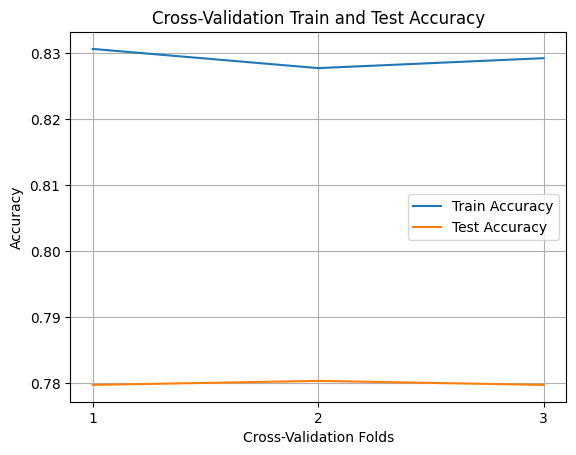

In [25]:
train_scores = cross_val_score(logreg_model, X_train, y_train, cv=3, scoring='accuracy')
test_scores = cross_val_score(logreg_model, X_test, y_test, cv=3, scoring='accuracy')

x_axis = list(range(len(train_scores)))

plt.plot(x_axis, train_scores, label='Train Accuracy')
plt.plot(x_axis, test_scores, label='Test Accuracy')
plt.xlabel('Cross-Validation Folds')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Train and Test Accuracy')
plt.xticks(x_axis, np.arange(1, len(x_axis)+1))
plt.legend()
plt.grid(True)
plt.show()

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest, chi2

k_best = 1000
chi2_selector = SelectKBest(chi2, k=k_best)
X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
X_test_chi2 = chi2_selector.transform(X_test)

nb_model = MultinomialNB()
nb_model.fit(X_train_chi2, y_train)

y_train_pred = nb_model.predict(X_train_chi2)
y_test_pred = nb_model.predict(X_test_chi2)

nb_train_accuracy = accuracy_score(y_train, y_train_pred)
nb_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {nb_train_accuracy}')
print(f'Test Accuracy: {nb_test_accuracy}')

Train Accuracy: 0.7784635788614569
Test Accuracy: 0.7792737658098735


In [27]:
# LSTM Model

vect = TfidfVectorizer(ngram_range=(1, 3)).fit(df['tweet'])
X = vect.transform(df['tweet'])
y = df['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from scipy.sparse import csr_matrix

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['tweet'])

X_train_texts = [" ".join(map(str, row)) for row in X_train_chi2]
X_test_texts = [" ".join(map(str, row)) for row in X_test_chi2]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_texts)
X_train_sequences = tokenizer.texts_to_sequences(X_train_texts)
X_test_sequences = tokenizer.texts_to_sequences(X_test_texts)
vocab_size = len(tokenizer.word_index) + 1
max_sequence_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128))
model.add(LSTM(units=256, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=128))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [31]:
history = model.fit(X_train_padded, y_train_encoded,
                    validation_data=(X_test_padded, y_test_encoded),
                    epochs=20, batch_size=64, callbacks=[early_stopping])

Epoch 1/20
307/307 [==============================] - 30s 66ms/step - loss: 0.6806 - accuracy: 0.7718 - val_loss: 0.6627 - val_accuracy: 0.7774
Epoch 2/20
307/307 [==============================] - 8s 26ms/step - loss: 0.6708 - accuracy: 0.7740 - val_loss: 0.6596 - val_accuracy: 0.7774
Epoch 3/20
307/307 [==============================] - 7s 23ms/step - loss: 0.6689 - accuracy: 0.7740 - val_loss: 0.6587 - val_accuracy: 0.7774
Epoch 4/20
307/307 [==============================] - 6s 19ms/step - loss: 0.6681 - accuracy: 0.7740 - val_loss: 0.6583 - val_accuracy: 0.7774
Epoch 5/20
307/307 [==============================] - 6s 19ms/step - loss: 0.6677 - accuracy: 0.7740 - val_loss: 0.6624 - val_accuracy: 0.7774
Epoch 6/20
307/307 [==============================] - 7s 22ms/step - loss: 0.6672 - accuracy: 0.7740 - val_loss: 0.6666 - val_accuracy: 0.7774
Epoch 7/20
307/307 [==============================] - 6s 19ms/step - loss: 0.6654 - accuracy: 0.7740 - val_loss: 0.6581 - val_accuracy: 0.777

In [32]:
test_loss, lstm_test_accuracy = model.evaluate(X_test_padded, y_test_encoded)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {lstm_test_accuracy}')

154/154 [==============================] - 1s 7ms/step - loss: 0.6576 - accuracy: 0.7774
Test Loss: 0.6576001644134521
Test Accuracy: 0.7774378061294556


In [33]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rfc_model.fit(X_train, y_train)

y_test_pred = rfc_model.predict(X_test)
y_train_pred = rfc_model.predict(X_train)

rfc_train_accuracy = accuracy_score(y_train,y_train_pred)
rfc_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {rfc_train_accuracy}')
print(f'Test Accuracy: {rfc_test_accuracy}')

Train Accuracy: 0.9999489900020404
Test Accuracy: 0.8751529987760098


In [34]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dtc_classifier = DecisionTreeClassifier(random_state=42)
dtc_classifier.fit(X_train, y_train)
y_train_pred = dtc_classifier.predict(X_train)
y_test_pred = dtc_classifier.predict(X_test)

dtc_train_accuracy = accuracy_score(y_train, y_train_pred)
dtc_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {dtc_train_accuracy}')
print(f'Test Accuracy: {dtc_test_accuracy}')

Train Accuracy: 1.0
Test Accuracy: 0.8771929824561403


In [35]:
# XGBoost Classifier
from xgboost import XGBClassifier

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train_encoded)
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

xgb_train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
xgb_test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f'Train Accuracy: {xgb_train_accuracy}')
print(f'Test Accuracy: {xgb_test_accuracy}')

Train Accuracy: 0.9248112630075495
Test Accuracy: 0.8908608731130151


In [36]:
# SVM Classifier
from sklearn.svm import SVC

svc_classifier = SVC(random_state=42)

svc_classifier.fit(X_train, y_train)

y_train_pred = svc_classifier.predict(X_train)
y_test_pred = svc_classifier.predict(X_test)

svc_train_accuracy = accuracy_score(y_train, y_train_pred)
svc_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {svc_train_accuracy}')
print(f'Test Accuracy: {svc_test_accuracy}')

Train Accuracy: 0.9784737808610487
Test Accuracy: 0.8494492044063647


In [39]:
model_names = ['Logistic Regression', 'Random Forest', 'Decisition Tree', 'XGBoost', 'SVC', 'LSTM']
test_accuracies = [logistic_test_accuracy, rfc_test_accuracy, dtc_test_accuracy, xgb_test_accuracy,
                   svc_test_accuracy, lstm_test_accuracy]

accuracy_df = pd.DataFrame({'Model': model_names, 'Test Accuracy': test_accuracies})

accuracy_df = accuracy_df.sort_values(by='Test Accuracy', ascending=False)

print(accuracy_df)

                 Model  Test Accuracy
3              XGBoost       0.890861
2      Decisition Tree       0.877193
1        Random Forest       0.875153
0  Logistic Regression       0.853121
4                  SVC       0.849449
5                 LSTM       0.777438


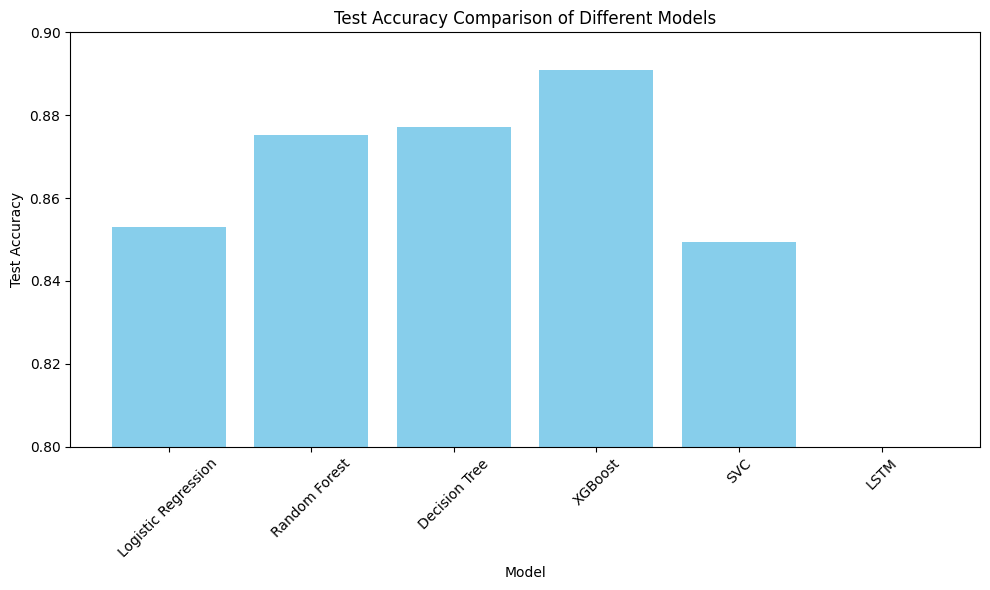

In [41]:
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost', 'SVC', 'LSTM']
test_accuracies = [0.853121, 0.875153, 0.877193, 0.890861, 0.849449, 0.777438]

plt.figure(figsize=(10, 6))
plt.bar(models, test_accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison of Different Models')
plt.ylim(0.8, 0.9)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

XGBoost is performing the best when compared to all the other models and hence we are selecting the XGBoost classifier as our final model for deployment

In [42]:
import joblib

best_xgbc_model = xgb_classifier
model_filename = '/content/drive/My Drive/Colab Notebooks/CreatorsLab/hate_speech/model/xgbc_model.pkl'
joblib.dump(best_xgbc_model, model_filename)
print("Best XGBoost Classifier model saved successfully.")

Best XGBoost Classifier model saved successfully.


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

model_filename = '/content/drive/My Drive/Colab Notebooks/CreatorsLab/hate_speech/model/xgbc_model.pkl'
loaded_xgbc_model = joblib.load(model_filename)

In [59]:
label_mapping = {
    "Hate Speech": "Hate Speech",
    "Offensive Language": "Offensive Language",
    "No Hate and Offensive": "No Hate and Offensive"
}

In [75]:
new_inputs = [
    "This is a great initiative to spread love and kindness.",
    "I can't believe you're so stupid!",
    "The event was organized beautifully."
]

In [76]:
def preprocess_input(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stopword]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    cleaned_text = ' '.join(lemmatized_tokens)
    return cleaned_text

preprocessed_inputs = [preprocess_input(text) for text in new_inputs]

vect = TfidfVectorizer(ngram_range=(1, 3)).fit(df['tweet'])
X_new = vect.transform(preprocessed_inputs)

predictions = loaded_xgbc_model.predict(X_new)

predicted_labels_mapped = label_encoder.inverse_transform(predictions)

In [77]:
for input_text, predicted_label in zip(new_inputs, predicted_labels_mapped):
    mapped_label = label_mapping[predicted_label]
    print(f"Input: {input_text}")
    print(f"Predicted Label: {mapped_label}\n")

Input: This is a great initiative to spread love and kindness.
Predicted Label: No Hate and Offensive

Input: I can't believe you're so stupid!
Predicted Label: No Hate and Offensive

Input: The event was organized beautifully.
Predicted Label: No Hate and Offensive

